In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

In [169]:
zomato = pd.read_csv('C:/Users/saran/Downloads/zomato.csv/zomato.csv')

In [170]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [171]:
zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [172]:
zomato.drop(['url','dish_liked', 'phone'], axis=1, inplace=True)

In [173]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [174]:
zomato.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [175]:
zomato.drop_duplicates(inplace=True)

In [176]:
zomato.dropna(inplace=True)

In [177]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [178]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [179]:
zomato.rename(columns={'approx_cost(for two people)': 'cost', 'listed_in(type)': 'type', 'listed_in(city)': 'city'}, inplace=True)

In [180]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [181]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       43499 non-null  object
 1   name          43499 non-null  object
 2   online_order  43499 non-null  object
 3   book_table    43499 non-null  object
 4   rate          43499 non-null  object
 5   votes         43499 non-null  int64 
 6   location      43499 non-null  object
 7   rest_type     43499 non-null  object
 8   cuisines      43499 non-null  object
 9   cost          43499 non-null  object
 10  reviews_list  43499 non-null  object
 11  menu_item     43499 non-null  object
 12  type          43499 non-null  object
 13  city          43499 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.0+ MB


In [182]:
zomato['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [183]:
zomato.cost = zomato.cost.apply(lambda x: x.replace(',', ''))

In [184]:
zomato.cost = zomato.cost.astype('float')

In [185]:
zomato.cost.info()

<class 'pandas.core.series.Series'>
Int64Index: 43499 entries, 0 to 51716
Series name: cost
Non-Null Count  Dtype  
--------------  -----  
43499 non-null  float64
dtypes: float64(1)
memory usage: 679.7 KB


In [186]:
zomato.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [187]:
zomato = zomato.loc[zomato.rate!='NEW']
zomato = zomato.loc[zomato.rate!='-']
zomato.rate = zomato.rate.apply(lambda x: x.replace('/5', '')).astype('float')

In [188]:
zomato.rate

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 41237, dtype: float64

In [189]:
zomato.name = zomato.name.apply(lambda x: x.title())

In [190]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [207]:
def title_fun(data):
    data = data.apply(lambda x: x.title())
    return data

In [208]:
title_fun(zomato.location)

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51709                    Whitefield
51711                    Whitefield
51712                    Whitefield
51715    Itpl Main Road, Whitefield
51716    Itpl Main Road, Whitefield
Name: location, Length: 41237, dtype: object

In [209]:
title_fun(zomato.rest_type)

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51709     Casual Dining, Bar
51711     Casual Dining, Bar
51712                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 41237, dtype: object

In [210]:
title_fun(zomato.name)

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51709                           The Farm House Bar N Grill
51711                                              Bhagini
51712    Best Brews - Four Points By Sheraton Bengaluru...
51715    Chime - Sheraton Grand Bengaluru Whitefield Ho...
51716                         The Nest - The Den Bengaluru
Name: name, Length: 41237, dtype: object

In [211]:
title_fun(zomato.address)

0        942, 21St Main Road, 2Nd Stage, Banashankari, ...
1        2Nd Floor, 80 Feet Road, Near Big Bazaar, 6Th ...
2        1112, Next To Kims Medical College, 17Th Cross...
3        1St Floor, Annakuteera, 3Rd Stage, Banashankar...
4        10, 3Rd Floor, Lakshmi Associates, Gandhi Baza...
                               ...                        
51709    136, Sap Labs India, Kiadb Export Promotion In...
51711    139/C1, Next To Gr Tech Park, Pattandur Agraha...
51712    Four Points By Sheraton Bengaluru, 43/3, White...
51715    Sheraton Grand Bengaluru Whitefield Hotel & Co...
51716    Itpl Main Road, Kiadb Export Promotion Industr...
Name: address, Length: 41237, dtype: object

In [212]:
title_fun(zomato.online_order)

0         True
1         True
2         True
3        False
4        False
         ...  
51709    False
51711    False
51712    False
51715    False
51716    False
Name: online_order, Length: 41237, dtype: object

In [213]:
def replace_fun (data):
    data = data.replace(['Yes', 'No'], ['True', 'False'], inplace= True)
    return data

In [214]:
replace_fun(zomato.online_order)

In [215]:
replace_fun(zomato.book_table)

In [216]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [234]:
#Encode the input Variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())
zomato_en.head() # looking at the dataset after transformation

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


In [235]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [236]:
zomato_en.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


In [237]:
zomato_en.corr()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
address,1.000000,0.682346,0.165707,0.021447,-0.036195,-0.010738,0.614626,0.030634,0.238421,-0.013922,0.512074,0.058929,0.094137,0.423011
name,0.682346,1.000000,0.231616,-0.033718,-0.046936,-0.043871,0.448705,0.036212,0.301793,0.057884,0.339130,-0.031798,0.116000,0.307128
online_order,0.165707,0.231616,1.000000,-0.054894,-0.069042,0.013278,0.048645,0.136741,0.049921,0.175627,0.051440,-0.362114,0.239236,0.054354
book_table,0.021447,-0.033718,-0.054894,1.000000,-0.426027,-0.393270,-0.032781,-0.226763,-0.225396,-0.614221,-0.132809,0.040496,-0.114302,-0.028847
rate,-0.036195,-0.046936,-0.069042,-0.426027,1.000000,0.435237,0.030363,0.196933,0.189624,0.385261,0.159661,0.054942,0.034038,0.023908
votes,-0.010738,-0.043871,0.013278,-0.393270,0.435237,1.000000,0.006847,0.221805,0.158714,0.366544,0.140364,-0.000754,0.070373,0.026348
location,0.614626,0.448705,0.048645,-0.032781,0.030363,0.006847,1.000000,0.046133,0.178518,0.067234,0.407854,0.089058,0.040451,0.361957
rest_type,0.030634,0.036212,0.136741,-0.226763,0.196933,0.221805,0.046133,1.000000,0.158553,0.315216,0.085501,-0.023399,0.147835,0.047756
cuisines,0.238421,0.301793,0.049921,-0.225396,0.189624,0.158714,0.178518,0.158553,1.000000,0.270041,0.196259,0.026915,0.083311,0.141997
cost,-0.013922,0.057884,0.175627,-0.614221,0.385261,0.366544,0.067234,0.315216,0.270041,1.000000,0.147086,-0.074417,0.185544,0.056594


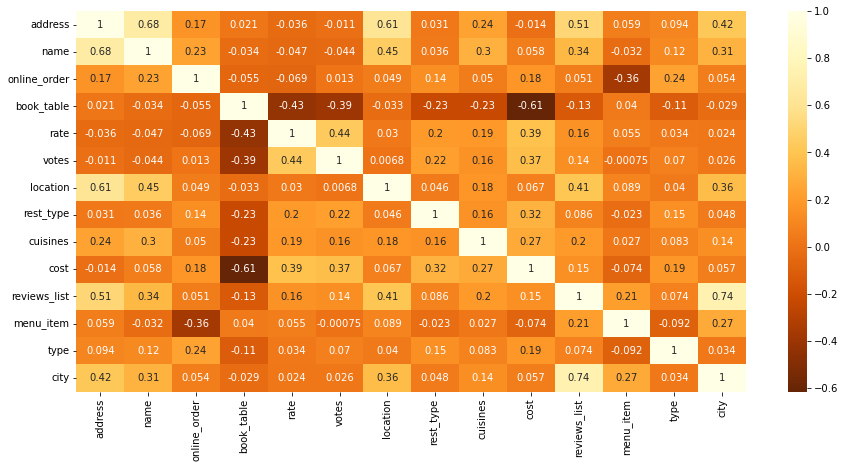

In [241]:
plt.figure(figsize=(15,7))
sns.heatmap(zomato_en.corr(), annot=True, cmap='YlOrBr_r')
plt.show()

In [243]:
y = zomato_en.loc[:, 'rate']

In [244]:
x = zomato_en.loc[:, ['online_order', 'book_table', 'votes', 'location', 'rest_type', 'cuisines', 'cost', 'menu_item']]

In [245]:
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,0,0,775,0,0,0,800.0,0
1,0,1,787,0,0,1,800.0,0
2,0,1,918,0,1,2,800.0,0
3,1,1,88,0,2,3,300.0,0
4,1,1,166,1,0,4,600.0,0


In [246]:
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [247]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [248]:
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
5538,0,1,31,30,2,78,450.0,858
46023,1,1,106,72,2,144,500.0,0
34942,0,1,175,12,0,304,450.0,0
29121,1,1,5,44,34,1119,400.0,0
38007,1,1,35,1,2,63,200.0,0


In [251]:
zomato_en.online_order.unique()

array([0, 1], dtype=int64)

In [252]:
zomato_en.cuisines.unique()

array([   0,    1,    2, ..., 2364, 2365, 2366], dtype=int64)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


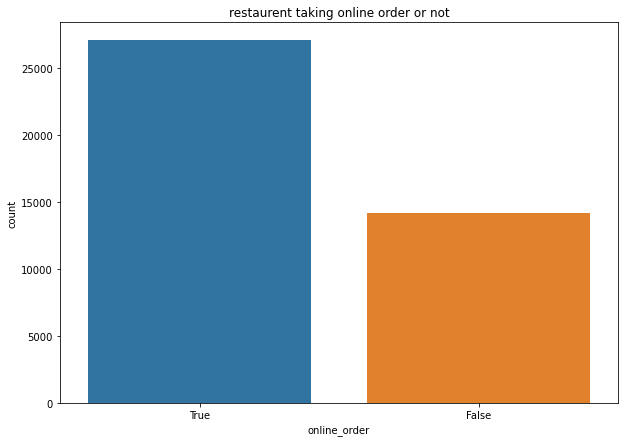

In [254]:
plt.figure(figsize=(10,7))
sns.countplot(zomato.online_order)
plt.title('restaurent taking online order or not')
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


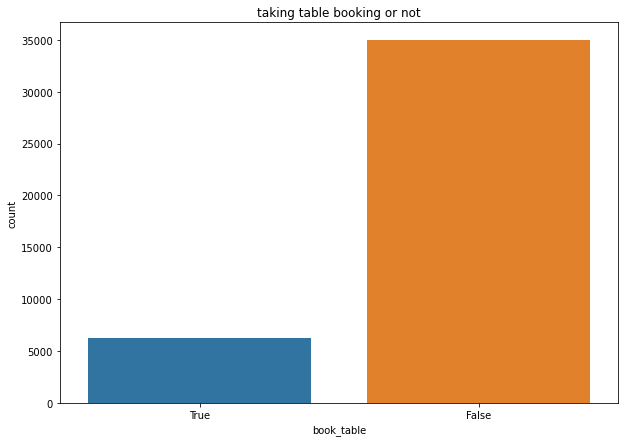

In [257]:
plt.figure(figsize=(10,7))
sns.countplot(zomato.book_table)
plt.title('taking table booking or not')
plt.show()

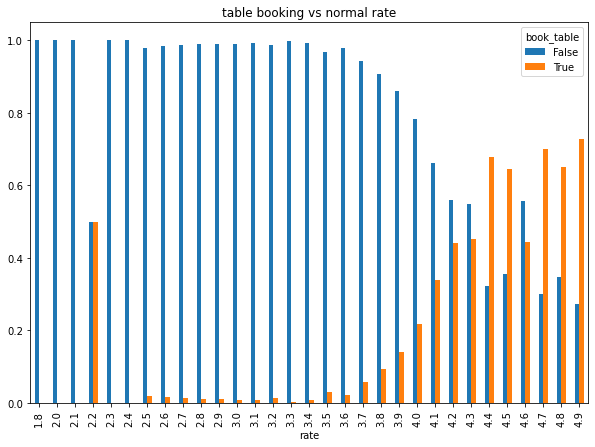

In [287]:
v = pd.crosstab(zomato['rate'], zomato['book_table'])
v.div(v.sum(1).astype('float'), axis=0).plot(kind='bar', figsize=(10,7))
plt.title('table booking vs normal rate')
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


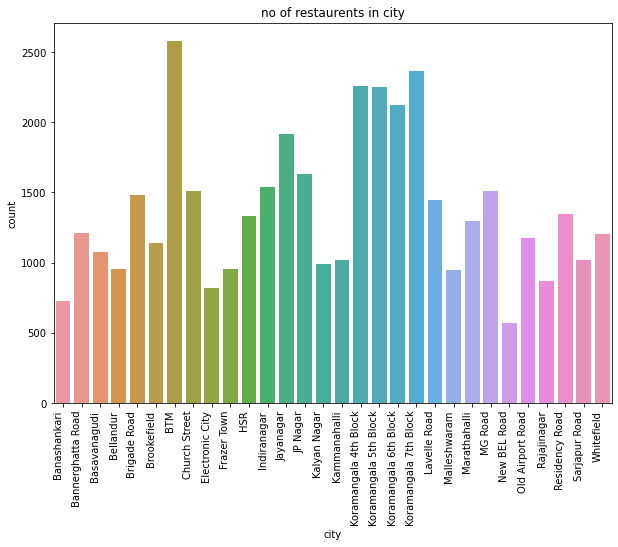

In [337]:
plt.figure(figsize=(10,7))
sns.countplot(zomato.city)
sns.countplot(zomato['city']).set_xticklabels(sns.countplot(zomato['city']).get_xticklabels(), rotation=90, ha="right")
plt.title('no of restaurents in city')
plt.show()

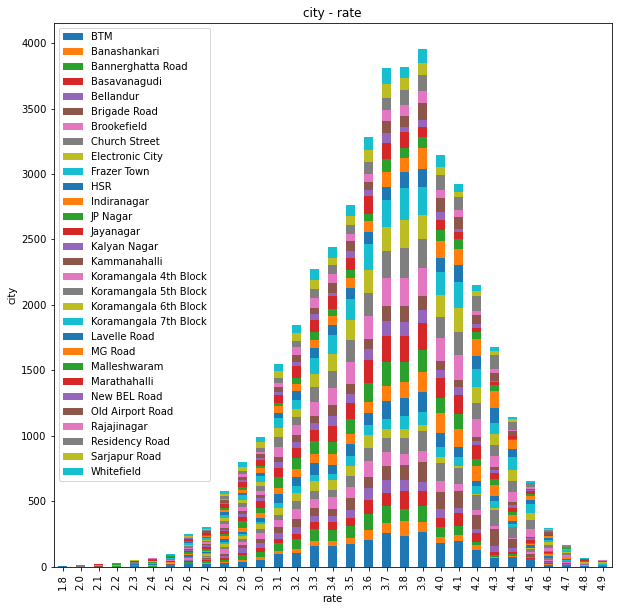

In [338]:
pd.crosstab(zomato['rate'], zomato['city']).plot(kind='bar', figsize=(10,10), stacked=True)
plt.title('city - rate')
plt.xlabel('rate')
plt.ylabel('city')
plt.legend(loc='upper left')

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restuarant Type')

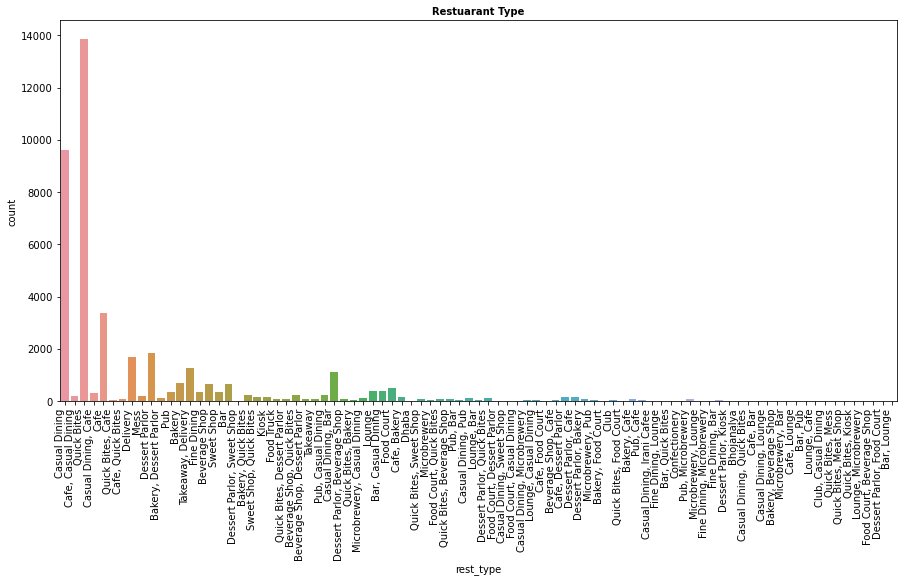

In [327]:
sns.countplot(zomato['rest_type'])
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,7)
plt.title('Restuarant Type', fontsize=10, fontweight='bold')

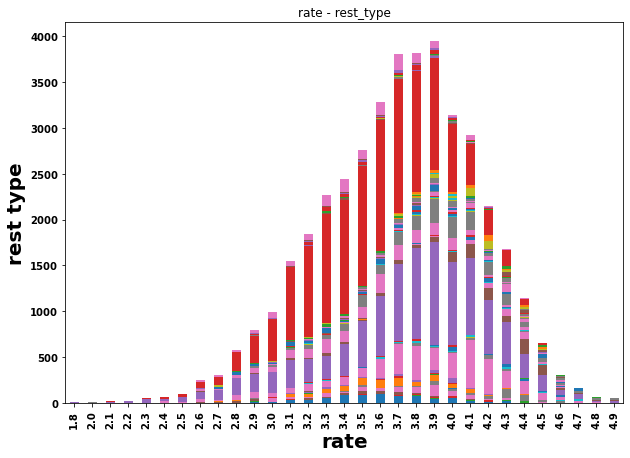

In [339]:
pd.crosstab(zomato['rate'], zomato['rest_type']).plot(kind='bar', figsize=(10,7), stacked = True)
plt.legend().remove();
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.xlabel('rate',fontsize=20,fontweight='bold')
plt.ylabel('rest type', fontsize=20,fontweight='bold')
plt.title('rate - rest_type')
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


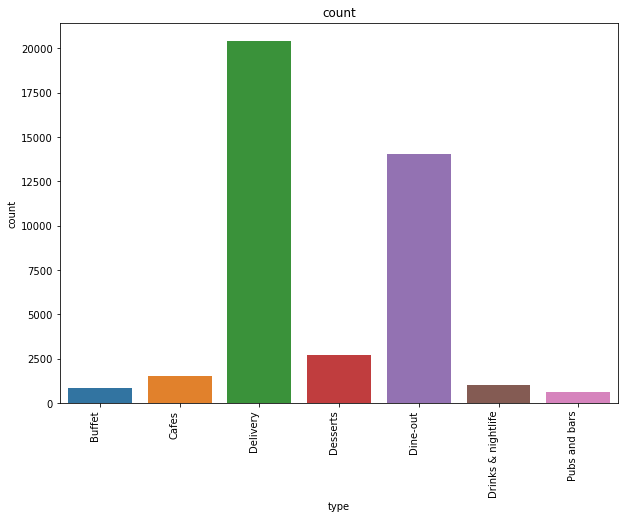

In [340]:
plt.figure(figsize=(10,7))
sns.countplot(zomato.type)
sns.countplot(zomato.type).set_xticklabels(sns.countplot(zomato.type).get_xticklabels(), rotation=90, ha='right')
plt.title('count')
plt.show()

Text(0, 0.5, 'type')

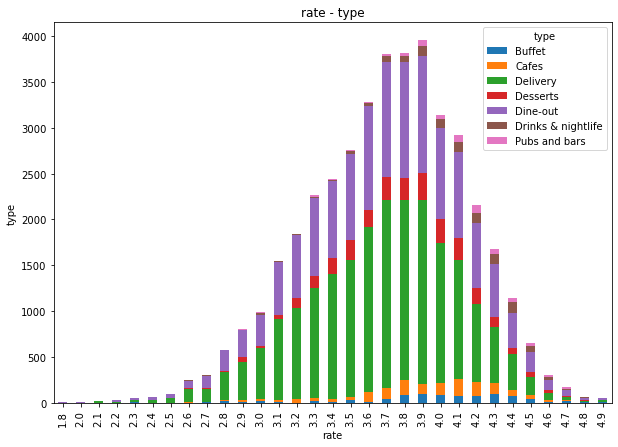

In [347]:
pd.crosstab(zomato.rate, zomato.type).plot(kind='bar', stacked = True, figsize=(10,7))
plt.title('rate - type')
plt.ylabel('type')

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


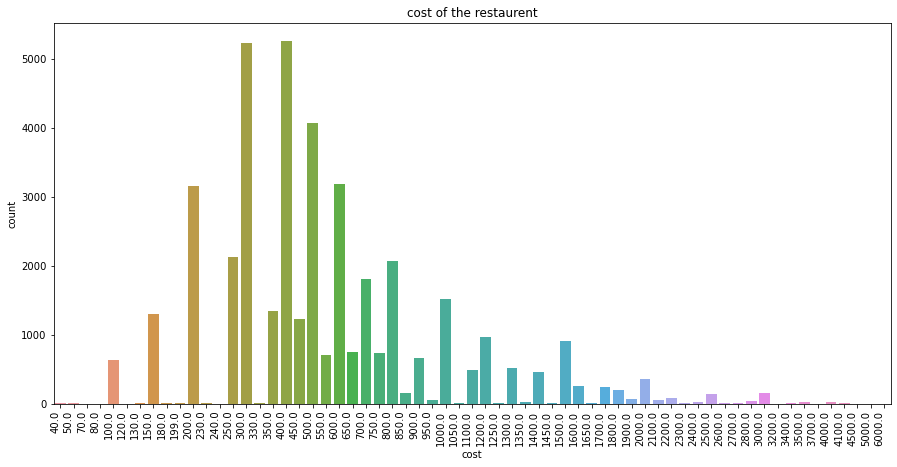

In [352]:
plt.figure(figsize=(15,7))
sns.countplot(zomato.cost)
sns.countplot(zomato.cost).set_xticklabels(sns.countplot(zomato.cost).get_xticklabels(), rotation=90, ha='right')
plt.title('cost of the restaurent')
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


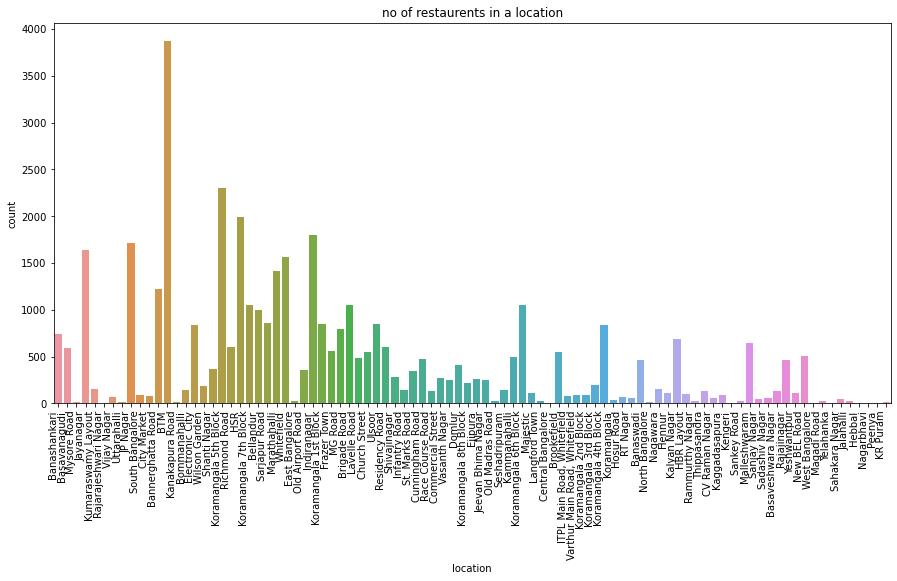

In [357]:
plt.figure(figsize=(15,7))
sns.countplot(zomato.location)
sns.countplot(zomato.location).set_xticklabels(sns.countplot(zomato.location).get_xticklabels(), rotation=90, ha='right')
plt.title('no of restaurents in a location')
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


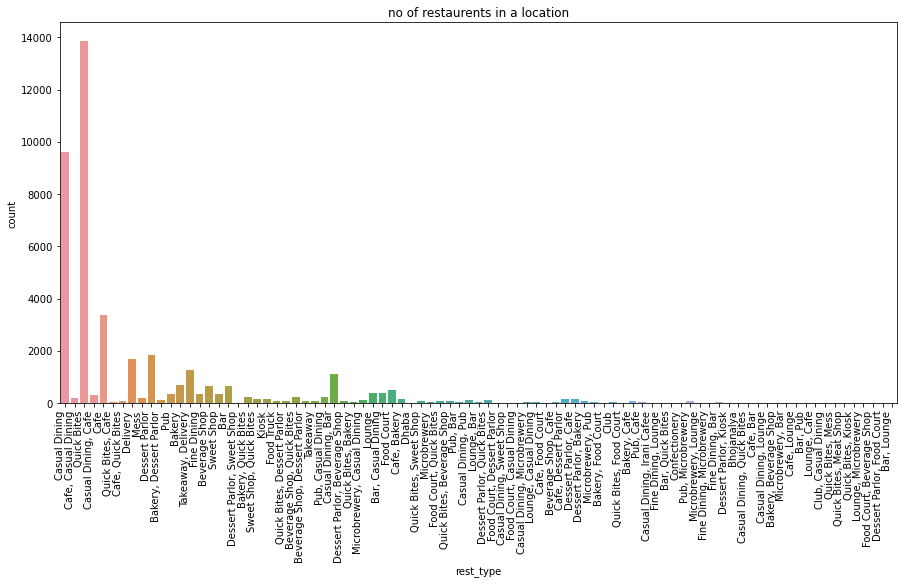

In [358]:
plt.figure(figsize=(15,7))
sns.countplot(zomato.rest_type)
sns.countplot(zomato.rest_type).set_xticklabels(sns.countplot(zomato.rest_type).get_xticklabels(), rotation=90, ha='right')
plt.title('no of restaurents in a location')
plt.show()

Text(0.5, 1.0, 'most famous restaurent chains in bangalore')

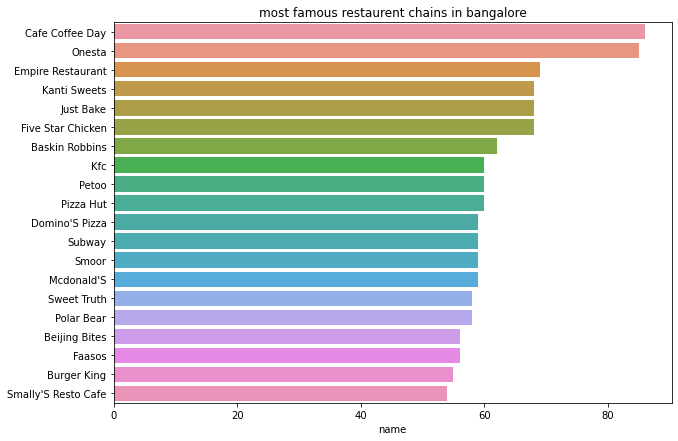

In [373]:
plt.figure(figsize=(10,7))
chains = zomato.name.value_counts()[:20]
sns.barplot(x = chains, y = chains.index)
plt.title('most famous restaurent chains in bangalore')

In [375]:
linear = LinearRegression()
linear.fit(x_train, y_train)
y_pred = linear.predict(x_test)
accuracy = r2_score(y_test, y_pred)


In [376]:
accuracy

0.285522152661276

In [377]:
dec = DecisionTreeRegressor()
dec.fit(x_train, y_train)
y_pred = dec.predict(x_test)
accuracy = r2_score(y_test, y_pred)

In [378]:
accuracy

0.8769313825919253

In [379]:
from sklearn.ensemble import RandomForestRegressor

In [380]:
ran = RandomForestRegressor()
ran.fit(x_train, y_train)
y_pred = ran.predict(x_test)
accuracy = r2_score(y_test, y_pred)

In [381]:
accuracy

0.9220114650694827

In [382]:
from sklearn.ensemble import ExtraTreesRegressor

In [386]:
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)
accuracy = r2_score(y_test, y_predict)

In [387]:
accuracy

0.9300598959390285

In [388]:
import pickle

In [389]:
pickle.dump(ETree, open('model.pkl','wb'))